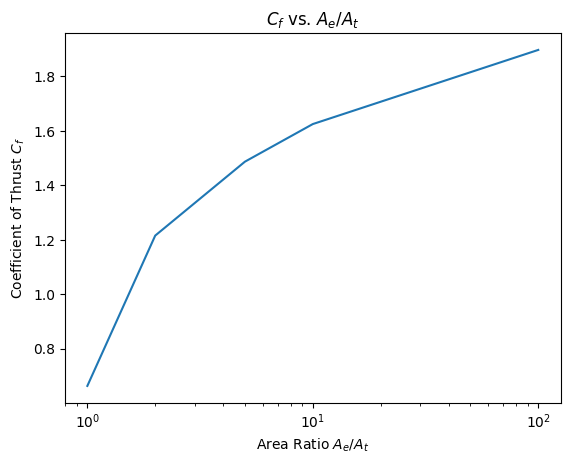

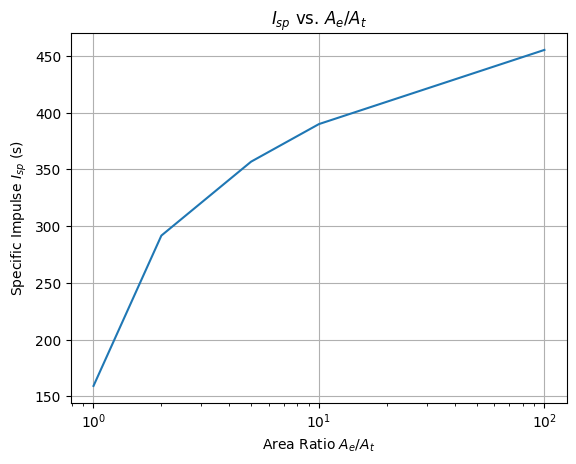

In [3]:
# Aero_402_Homework_2

from SurfleetToolbox import *
import matplotlib.pyplot as plt

Ae_At = [1.0000,2.0000,5.0000,10.000,100.00]

Cf = [0.6636,1.2157,1.4872,1.6253,1.8976]

Isp = [1562.2,2861.9,3501.0,3826.0,4467.1]
Isp = [Isp[i]/9.81 for i in range(len(Isp))]

plt.figure()
plt.semilogx(Ae_At,Cf)
plt.title(r"$C_f$ vs. $A_{e}/A_{t}$")
plt.ylabel("Coefficient of Thrust $C_f$")
plt.xlabel("Area Ratio $A_{e}/A_{t}$")

plt.figure()
plt.semilogx(Ae_At,Isp)
plt.title(r'$I_{sp}$ vs. $A_{e}/A_{t}$')
plt.ylabel("Specific Impulse $I_{sp}$ (s)")
plt.xlabel("Area Ratio $A_{e}/A_{t}$")
plt.grid()


a. This plot shows that as Area ratio increases, coeffecient of thrust increases, with diminishing returns. This makes sense, because the area ratio is a factor in the pressure thrust. Area ratio also effects the exit pressure. 

b. This plot shows that as Area ratio increases, specific impulse increases, with diminishing returns. I noticed in CEA that there were still other combustion by products besides H2 and H2O at the exit plane in all but the Ae/At = 100 nozzle. The speed of the flow also increases as it goes through a diverging nozzle at supersonic speeds, which contributes to a higher characteristic velocity, and thus a higher Isp.

In [4]:
# Problem 3

k = 1.3
Aratio = 6
p1 = 20

CfSea = thrustCoeff(p1,1,Aratio,k)
CfAlt = thrustCoeff(p1,0.025,Aratio,k)

PercentDiff = (CfSea - CfAlt) / CfSea * 100

print(CfSea)
print(CfAlt)

print(abs(PercentDiff))


1.3346705681780802
1.6271705681780801
21.9155203519085


In [5]:
# Problem 4

CpVsT = [dataRead("CO_Cp_v_T.tsv"),
         dataRead("CO2_Cp_v_T.tsv"),
         dataRead("H2_Cp_v_T.tsv"),
         dataRead("H2O_Cp_v_T.tsv"),
         dataRead("N2_Cp_v_T.tsv")]

n = {
    'CO' :0.836,
    'CO2':0.164,
    'H2' :0.664,
    'H2O':0.836,
    'N2' :0.5,
    'CH3NO2':1
}

nr = [0.836,
      0.164,
      0.664,
      0.836,
      0.5]

HeatofFormation = {
    'CO' :-110.53,
    'CO2':-393.522,
    'H2' :0,
    'H2O':-241.826,
    'N2' :0,
    'CH3NO2':-113.1
}

Ti = 298 # K
Tref = 298 # K

deltaHrxn = n['CO']*HeatofFormation['CO'] + n['CO2']*HeatofFormation['CO2'] + n['H2']*HeatofFormation['H2'] + n['H2O']*HeatofFormation['H2O'] + n['N2']*HeatofFormation['N2'] - n['CH3NO2']*HeatofFormation['CH3NO2']

print(deltaHrxn)

# integration
total = 0
i = 0

while -total >= deltaHrxn:
    step = []
    for agent in CpVsT:
        if agent['0'][i] == 300:
            step.append(linInterp(Tref,agent['0'][i-1],agent['0'][i],agent['1'][i-1],agent['1'][i]) * (300-Tref))
        elif agent['0'][i] > 300:
            step.append(agent['1'][i] * (agent['0'][i] - agent['0'][i-1]))

    step = [nr[j]*step[j] for j in range(len(step))]
    print(step)

    total = total + sum(step)
    i = i + 1

print(linInterp(deltaHrxn,-total,-total+sum(step),CpVsT[0]['0'][i-1],CpVsT[0]['0'][i-2]))

Cp = []
for agent in CpVsT:
    Cp.append(agent['1'][i])

print(Cp)
Cp = [nr[j]*Cp[j] for j in range(len(Cp))]
print(Cp)
print(sum(Cp))

print(characteristVelocity(0.96,507.48,317))

-246.00722399999998
[]
[]
[]
[]
[1.73888, 0.27677952, 18.9919936, 3.1159392, 1.03992]
[21.756899999999998, 3.5711, 238.708, 39.103899999999996, 13.0]
317.4640809084839
[1.043, 0.895, 14.43, 1.88, 1.041]
[0.871948, 0.14678000000000002, 9.581520000000001, 1.5716799999999997, 0.5205]
12.692428000000001
697.5061603551102


Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection Method not possible
Bisection 

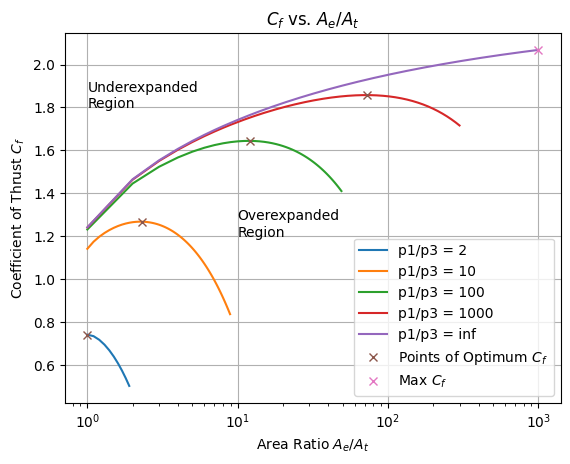

In [6]:
# Problem 5
k = 1.2

p1 = [2,10,100,1000,99999999999999999999] # p1/p3
p3 = 1

CfMax = []
AratioMax = []

Aratio = [0.1*i+1 for i in range(10)]
Cf = [thrustCoeff(p1[0],p3,Aratio[i],k) for i in range(10)]
plt.plot(Aratio,Cf,label="p1/p3 = {}".format(p1[0]))
imax = getMaxIndex(Cf)
CfMax.append(Cf[imax])
AratioMax.append(Aratio[imax])

Aratio = [i*0.1+1 for i in range(80)]
Cf = [thrustCoeff(p1[1],p3,Aratio[i],k) for i in range(80)]
plt.plot(Aratio,Cf,label="p1/p3 = {}".format(p1[1]))
imax = getMaxIndex(Cf)
CfMax.append(Cf[imax])
AratioMax.append(Aratio[imax])

Aratio = [i for i in range(1,50)]
Cf = [thrustCoeff(p1[2],p3,Aratio[i],k) for i in range(49)]
plt.plot(Aratio,Cf,label="p1/p3 = {}".format(p1[2]))
imax = getMaxIndex(Cf)
CfMax.append(Cf[imax])
AratioMax.append(Aratio[imax])

Aratio = [i for i in range(1,300)]
Cf = [thrustCoeff(p1[3],p3,Aratio[i],k) for i in range(299)]
plt.plot(Aratio,Cf,label="p1/p3 = {}".format(p1[3]))
imax = getMaxIndex(Cf)
CfMax.append(Cf[imax])
AratioMax.append(Aratio[imax])

Aratio = [i for i in range(1,1000)]
Cf = [thrustCoeff(p1[4],p3,Aratio[i],k) for i in range(999)]
plt.semilogx(Aratio,Cf,label="p1/p3 = inf")

plt.plot(AratioMax,CfMax,marker = 'x',linestyle='None',label="Points of Optimum $C_f$")
plt.plot(Aratio[-1],Cf[-1],marker = 'x',linestyle='None',label="Max $C_f$")

plt.legend()

plt.text(1,1.8,"Underexpanded\nRegion")
plt.text(10,1.2,"Overexpanded\nRegion")

plt.title(r"$C_f$ vs. $A_{e}/A_{t}$")
plt.ylabel("Coefficient of Thrust $C_f$")
plt.xlabel("Area Ratio $A_{e}/A_{t}$")
plt.grid()

An expansion ratio means a cylinder that does not diverge. The area of the exit plane is the same as the throat. My solution is dependent upon the condition that mach 1 is reached at the throat and the flow is choked.